In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [7]:
def read(file):
    res = pd.read_csv(file, delimiter="|", 
                  names=['slot', 'received_at', 'eligible_at', 'optimistic', 'decode_duration',
                         'prechecks_duration', 'simulation_duration', 'redis_update_duration', 'total_duration'])
    res['received_at'] = pd.to_datetime(res['received_at'], format="%Y-%m-%d%H:%M:%S.%f")
    res['eligible_at'] = pd.to_datetime(res['eligible_at'], format="%Y-%m-%d%H:%M:%S.%f")
    return res

In [8]:
b1b = read('manta0xb1b.txt')
b5a = read('manta0xb5a.txt')
a0d = read('manta0xa0d.txt')

In [9]:
len(b1b), len(b5a), len(a0d)

(188400, 174080, 170777)

In [26]:
b1b['redis_update_duration'].mean(), b5a['total_duration'].mean(), a0d['total_duration'].mean()

(78434.05158174098, 239359.19604204962, 245769.84670066813)

In [27]:
len(b1b)*0.01

1884.0

In [10]:
b1b.head()

,slot,received_at,eligible_at,optimistic,decode_duration,prechecks_duration,simulation_duration,redis_update_duration,total_duration
0,6069555,2023-03-24 11:51:24.018092,2023-03-24 11:51:24.191383,t,109519,47079,2,16688,173290
1,6069555,2023-03-24 11:51:20.431738,2023-03-24 11:51:20.546625,t,107643,1311,7,5924,114887
2,6069555,2023-03-24 11:51:20.670680,2023-03-24 11:51:20.783678,t,103079,2019,2,7896,112997
3,6069555,2023-03-24 11:51:20.941261,2023-03-24 11:51:21.058628,t,109373,1673,9,6309,117367
4,6069555,2023-03-24 11:51:21.651532,2023-03-24 11:51:21.765917,t,101931,1764,8,10680,114385


In [29]:
b1b_plt = b1b[b1b['total_duration'] < np.quantile(b1b['total_duration'].values, 0.99)]
b5a_plt = b5a[b5a['total_duration'] < np.quantile(b5a['total_duration'].values, 0.99)]
a0d_plt = a0d[a0d['total_duration'] < np.quantile(a0d['total_duration'].values, 0.99)]

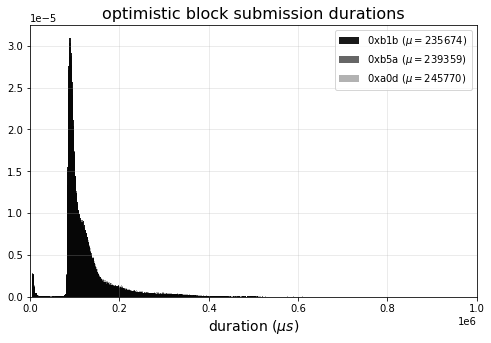

In [36]:
f, ax = plt.subplots(figsize=(8,5))
bins = np.histogram(b1b_plt['total_duration'], bins=1000)[1]
ax.hist(b1b_plt['decode_duration'], bins=bins, color='black', alpha=0.9, density=True, 
        label='0xb1b $(\mu = {:0.0f})$'.format(b1b['total_duration'].values.mean()))
ax.hist(b5a_plt['decode_duration'], bins=bins, color='black', alpha=0.6, density=True, 
        label='0xb5a $(\mu = {:0.0f})$'.format(b5a['total_duration'].values.mean()))
ax.hist(a0d_plt['decode_duration'], bins=bins, color='black', alpha=0.3, density=True, 
        label='0xa0d $(\mu = {:0.0f})$'.format(a0d['total_duration'].values.mean()))
ax.set_xlim(0, int(1e6))
ax.legend(loc=0)
ax.set_xlabel('duration $(\mu s)$', size=14)
ax.set_title('optimistic block submission durations', size=16)
# ax.set_title('total duration; $\mu = {:0.0f}$'.format(nopts['total_duration'].values.mean()), size=18)
plt.show()

In [18]:
printdf(a0d)

decode\_duration & 107481 & 140666 & 216731 & 492392 \\
prechecks\_duration & 1842 & 2886 & 25565 & 510335 \\
simulation\_duration & 8 & 10 & 12 & 74 \\
redis\_update\_duration & 8012 & 15027 & 99126 & 1733371 \\
\hline
\textbf{total\_duration} & \textbf{122740} & \textbf{180084} & \textbf{387015} & \textbf{2599757} \\


In [14]:
def printdf(df):
    print('decode\_duration & ', end='')
    st = ''
    for i in [50, 75, 90, 99]:
        st += str(int(np.percentile(df['decode_duration'], i)))
        st += " & "
    print(st[:-3] + ' \\\\')
    st = ''
    print('prechecks\_duration & ', end='')
    for i in [50, 75, 90, 99]:
        st += str(int(np.percentile(df['prechecks_duration'], i)))
        st += " & "
    print(st[:-3] + ' \\\\')
    st = ''
    print('simulation\_duration & ', end='')
    for i in [50, 75, 90, 99]:
        st += str(int(np.percentile(df['simulation_duration'], i)))
        st += " & "
    print(st[:-3] + ' \\\\')
    st = ''
    print('redis\_update\_duration & ', end='')
    for i in [50, 75, 90, 99]:
        st += str(int(np.percentile(df['redis_update_duration'], i)))
        st += " & "
    print(st[:-3] + ' \\\\')
    st = ''
    print('\\hline')
    print('\\textbf{total\_duration} & ', end='')
    for i in [50, 75, 90, 99]:
        st += '\\textbf{{{}}}'.format(str(int(np.percentile(df['total_duration'], i))))
        st += " & "
    print(st[:-3] + ' \\\\')